# 
Using seaborn, create a heatmap to visualize the correlation coefficients between
earthquake magnitude and whether there was a tsunami for earthquakes measured
with the mb magnitude type.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
quakes = pd.read_csv('data/earthquakes.csv')
quakes

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


In [3]:
mb_quakes = quakes.query('magType== "mb"')
mb_quakes

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
55,4.6,mb,1539453241120,"242km NNW of Farallon de Pajaros, Northern Mar...",0,Northern Mariana Islands
67,4.6,mb,1539448501800,"160km NNW of Nago, Japan",0,Japan
91,4.7,mb,1539437762090,"32km SE of Muisne, Ecuador",0,Ecuador
...,...,...,...,...,...,...
9297,4.2,mb,1537238925690,"2km NE of Kato Achaia, Greece",0,Greece
9304,5.1,mb,1537236235470,"34km NW of Finschhafen, Papua New Guinea",1,Papua New Guinea
9309,4.8,mb,1537234582260,"11km ESE of Rotorua, New Zealand",0,New Zealand
9319,4.4,mb,1537231966170,"58km W of San Antonio de los Cobres, Argentina",0,Argentina


In [4]:
mb_quakes.corr()

,mag,time,tsunami
mag,1.000000,0.155553,0.448921
time,0.155553,1.000000,-0.020662
tsunami,0.448921,-0.020662,1.000000


Text(0.5, 1.0, 'Correlation between earthquake magnitude mb and whether there was a tsunami')

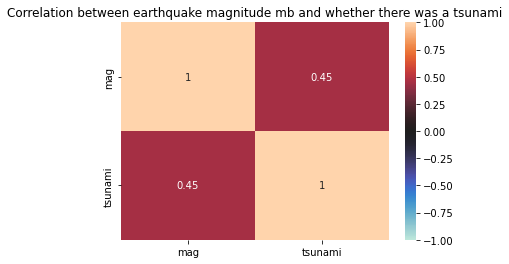

In [5]:
sns.heatmap(mb_quakes[["mag","tsunami"]].corr(),annot=True,center=0,vmin=-1,vmax=1)
plt.title('Correlation between earthquake magnitude mb and whether there was a tsunami')

Text(0.5, 1.0, 'Correlation between earthquake magnitude mb and whether there was a tsunami')

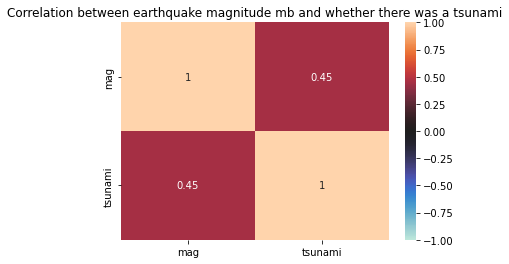

In [6]:
sns.heatmap(
    quakes.query('magType == "mb"')[['mag','tsunami']].corr(), 
    annot=True, center=0, vmin=-1, vmax=1
)
plt.title('Correlation between earthquake magnitude mb and whether there was a tsunami')

# 
Create a box plot of Facebook volume traded and closing prices, and draw reference
lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be
at Q1 − 1.5   IQR and Q3 + 1.5   IQR. Be sure to use the quantile() method on
the data to make this easier. (Pick whichever orientation you prefer for the plot, but
make sure to use subplots.)

In [7]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


<AxesSubplot:>

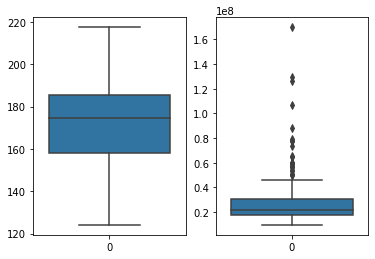

In [8]:
fig,axes= plt.subplots(1,2)
sns.boxplot(data=fb['close'], ax=axes[0])
sns.boxplot(data=fb['volume'],ax=axes[1])

In [9]:

q1_close=fb['close'].quantile(0.25)
q3_close=fb['close'].quantile(0.75)
IQR_close= q3_close-q1_close

q1_vol=fb['volume'].quantile(0.25)
q3_vol=fb['volume'].quantile(0.75)
IQR_vol= q3_vol-q1_vol

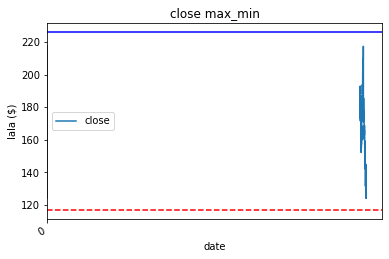

In [10]:
ax = sns.boxplot(data=fb['close'])
fb['close'].plot(title='close max_min')
plt.axhline(
    y=q1_close-1.5*IQR_close, color='r', linestyle='--')
plt.axhline(
    y=q3_close+1.5*IQR_close, color='b', linestyle='-')
#sns.boxplot(data=fb['close'], ax=axes[0])
plt.ylabel('lala ($)')
plt.legend()

# 
Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed
vertical line on the date that it surpassed 1 million. Be sure to format the tick labels
on the y-axis accordingly.

In [11]:
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [13]:
cumulative_covid_cases = covid.groupby(pd.Grouper(freq='1D')).cases.sum().apply('cumsum')

In [17]:
cumulative_covid_cases

date
2020-01-18          17
2020-01-19         153
2020-01-20         173
2020-01-21         326
2020-01-22         468
                ...   
2020-09-14    29079659
2020-09-15    29322522
2020-09-16    29626504
2020-09-17    29917646
2020-09-18    30231304
Freq: D, Name: cases, Length: 245, dtype: int64

In [24]:
date_million = cumulative_covid_cases[cumulative_covid_cases>=1000000].index[0]
date_million

Timestamp('2020-04-03 00:00:00', freq='D')

In [50]:
ten_million=  cumulative_covid_cases[cumulative_covid_cases>=10000000].index[0]
ten_million

Timestamp('2020-06-29 00:00:00', freq='D')

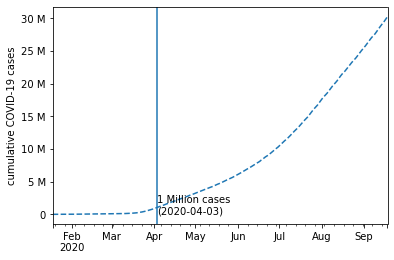

In [56]:
from matplotlib.ticker import EngFormatter
ax= cumulative_covid_cases.plot(style=['--'])
ax.axvline(date_million)

plt.annotate(
    f'1 Million cases\n({date_million.strftime("2020-04-03")})',
    xy=('2020-04-03 00:00:00', date_million)
)
ax.set(xlabel='', ylabel='cumulative COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())